# PyconHK

#### Import libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Download dataset
**Car Sales dataset:** contains monthly sales data. We will apply the following gap-filling techniques to generate daily sales data:

- Linear Interpolation
- Spline Interpolation
- Simple, Cumulative, and Exponential Moving Average
- Kalman Smoothing


In [277]:
# download car sales dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [278]:
# change month to datetime
df['Month'] = pd.to_datetime(df['Month'])
# sort dates
df.sort_values(by='Month',inplace=True) 

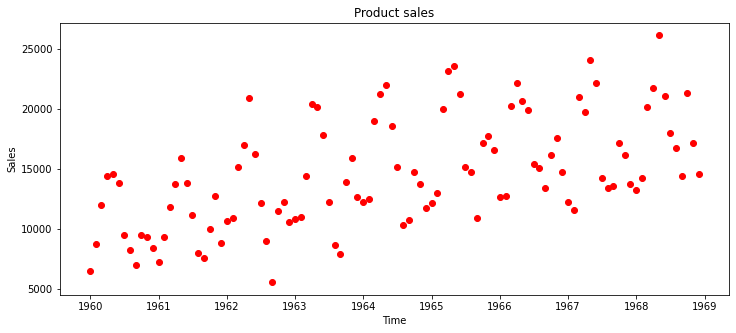

In [279]:
# Plot product sales 
ts = df.groupby(df['Month'], sort=False)['Sales'].sum()
plt.figure(figsize=(12,5))
plt.title('Product sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts, 'ro');

We can see from above that there are several missing values, since the sales data was recorded monthly. Let's generate the values for daily sales based on the data.

In order to use the next pandas' functions, we must change the dataset index to datetime type:

In [280]:
# Change the index 
df.set_index(['Month'], inplace=True)

### Linear Interpolation

Linear interpolation calculates values that lie on a line between two known data points. This is a good choice for fairly linear data, like a series with a strong trend. 

In [281]:
# Resample data and fill the values using linear interpolation 
resampled = df.Sales.resample('1D')
linear = resampled.interpolate(method='linear')
linear.head()

Month
1960-01-01    6550.000000
1960-01-02    6620.258065
1960-01-03    6690.516129
1960-01-04    6760.774194
1960-01-05    6831.032258
Freq: D, Name: Sales, dtype: float64

In [282]:
# Augmented dataset
data = pd.DataFrame(linear)
data['LI'] = data['Sales']
data['Sales'] = df['Sales']
data.head()

,Sales,LI
Month,,
1960-01-01,6550.0,6550.000000
1960-01-02,NaN,6620.258065
1960-01-03,NaN,6690.516129
1960-01-04,NaN,6760.774194
1960-01-05,NaN,6831.032258


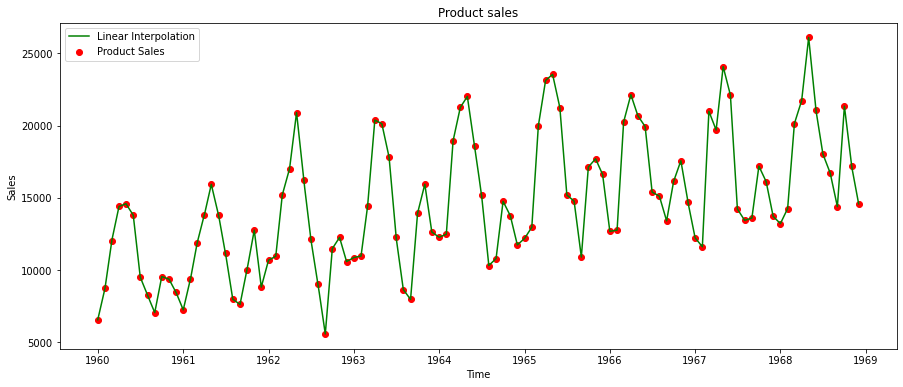

In [285]:
# Plot Linear Interpolation
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

### Spline Interpolation

Spline interpolation is a form of interpolation. It often has less errors as polynomial interpolation, because it does not presents large oscilations between data points. Spline Interpolation is more appropriate for data without a strong trend.


Visual Example of Linear Interpolation and Spline Interpolation:

<img src='https://www.orcina.com/webhelp/OrcaFlex/Content/image/LinearInterpolation.png'>

<img src='https://www.orcina.com/webhelp/OrcaFlex/Content/image/CubicSplineInterpolation.png'>

Ref. www.orcina.com

In [286]:
# Calculate the spline interpolation
spline = resampled.interpolate(method='spline', order=3)
data['Spline'] = spline
spline.head()

Month
1960-01-01    6550.000000
1960-01-02    6571.041915
1960-01-03    6596.262592
1960-01-04    6625.571852
1960-01-05    6658.876538
Freq: D, Name: Sales, dtype: float64

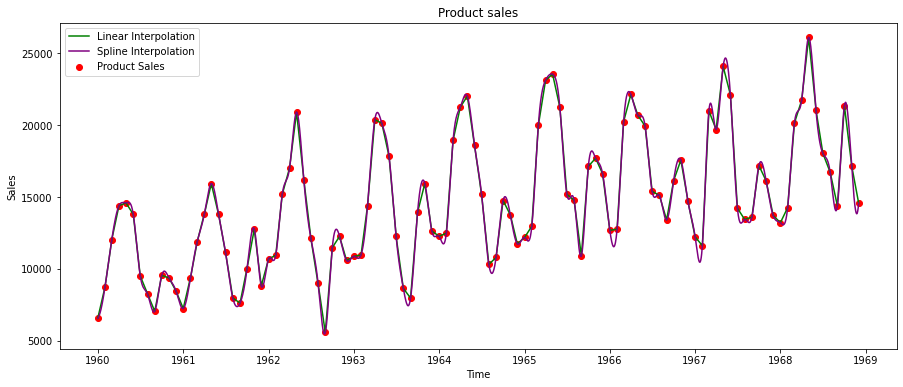

In [287]:
# Plot product sales 
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.plot(data.index, data['Spline'], c=colors[2], label='Spline Interpolation') 
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

### Simple Moving Average
https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

Simple Moving Average (SMA) uses a sliding window to take the average or mean value over a number of n time periods. It is an equally weighted mean of the previous n data, here n=5

[Wiki](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average)

In [288]:
# Calculate the Simple Moving .Average with a window size of 5
data['SMA'] = data['LI'].rolling(window=5, min_periods=1).mean()
data.head()

,Sales,LI,Spline,SMA
Month,,,,
1960-01-01,6550.0,6550.000000,6550.000000,6550.000000
1960-01-02,NaN,6620.258065,6571.041915,6585.129032
1960-01-03,NaN,6690.516129,6596.262592,6620.258065
1960-01-04,NaN,6760.774194,6625.571852,6655.387097
1960-01-05,NaN,6831.032258,6658.876538,6690.516129


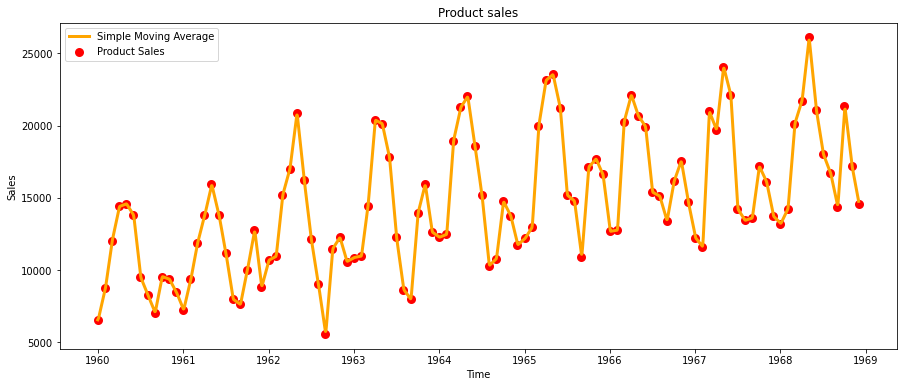

In [289]:
# Plot Simple Moving Average
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales', linewidth=3) #original data
ax.plot(data.index, data['SMA'], c=colors[3], label='Simple Moving Average', linewidth=3)
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

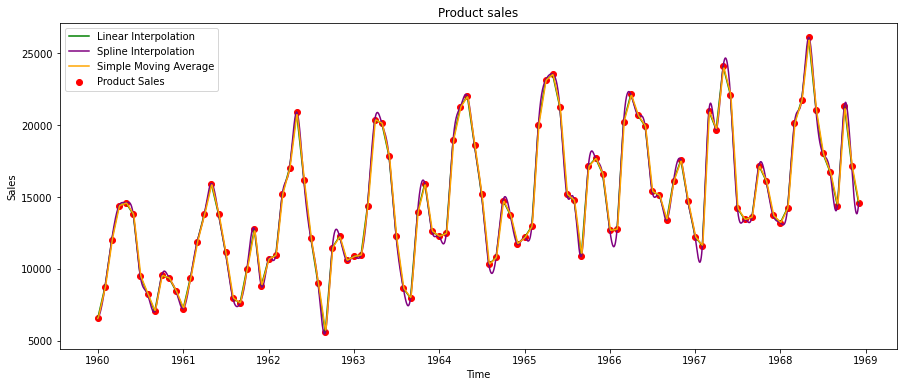

In [290]:
# Plot product sales 
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.plot(data.index, data['Spline'], c=colors[2], label='Spline Interpolation') 
ax.plot(data.index, data['SMA'], c=colors[3], label='Simple Moving Average')
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

### Cumulative Moving Average 

Similar to Simple Moving Average, it considers all prior observations.

[Wiki](https://en.wikipedia.org/wiki/Moving_average#Cumulative_moving_average)

In [291]:
# Calculate Cumulative Moving Average
data['CMA'] = data['LI'].expanding().mean()
data.head(10)

,Sales,LI,Spline,SMA,CMA
Month,,,,,
1960-01-01,6550.0,6550.000000,6550.000000,6550.000000,6550.000000
1960-01-02,NaN,6620.258065,6571.041915,6585.129032,6585.129032
1960-01-03,NaN,6690.516129,6596.262592,6620.258065,6620.258065
1960-01-04,NaN,6760.774194,6625.571852,6655.387097,6655.387097
1960-01-05,NaN,6831.032258,6658.876538,6690.516129,6690.516129
1960-01-06,NaN,6901.290323,6696.083490,6760.774194,6725.645161
1960-01-07,NaN,6971.548387,6737.099548,6831.032258,6760.774194
1960-01-08,NaN,7041.806452,6781.831554,6901.290323,6795.903226
1960-01-09,NaN,7112.064516,6830.186348,6971.548387,6831.032258


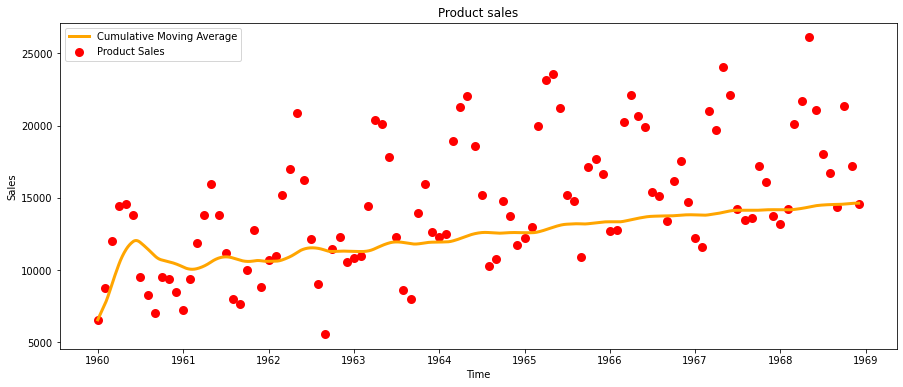

In [292]:
# Plot Cumulative Moving Average
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales', linewidth=3) #original data
ax.plot(data.index, data['CMA'], c=colors[3], label='Cumulative Moving Average', linewidth=3)
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

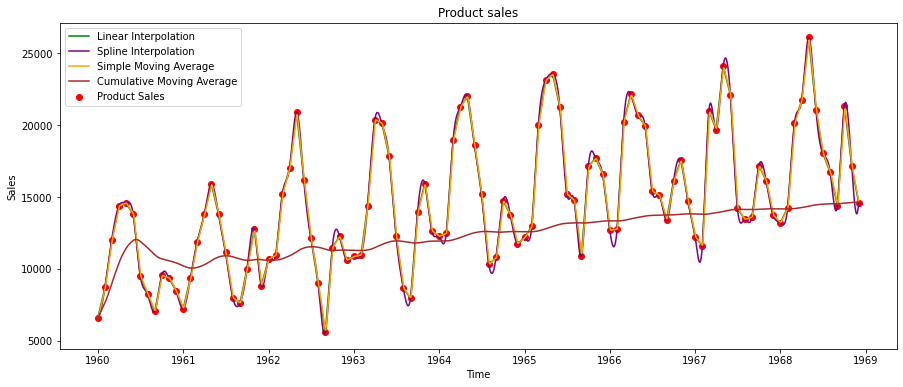

In [293]:
# Plot product sales 
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.plot(data.index, data['Spline'], c=colors[2], label='Spline Interpolation') 
ax.plot(data.index, data['SMA'], c=colors[3], label='Simple Moving Average')
ax.plot(data.index, data['CMA'], c=colors[4], label='Cumulative Moving Average')
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

### Exponential Moving Average

Similar to Simple Moving Average, it assigns more weights to recent data.

[Wiki](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average)

In [294]:
# Calculate Exponential Moving Average
data['EMA'] = data['LI'].ewm(alpha=0.5, adjust=False).mean()

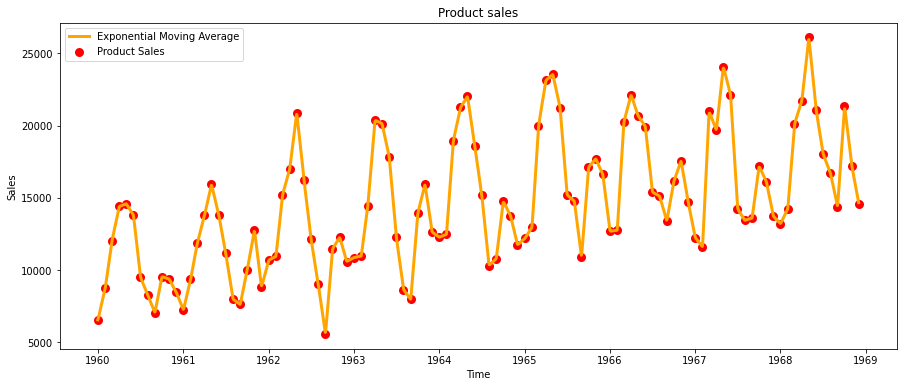

In [295]:
# Plot Exponential Moving Average
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales', linewidth=3) #original data
ax.plot(data.index, data['EMA'], c=colors[3], label='Exponential Moving Average', linewidth=3)
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

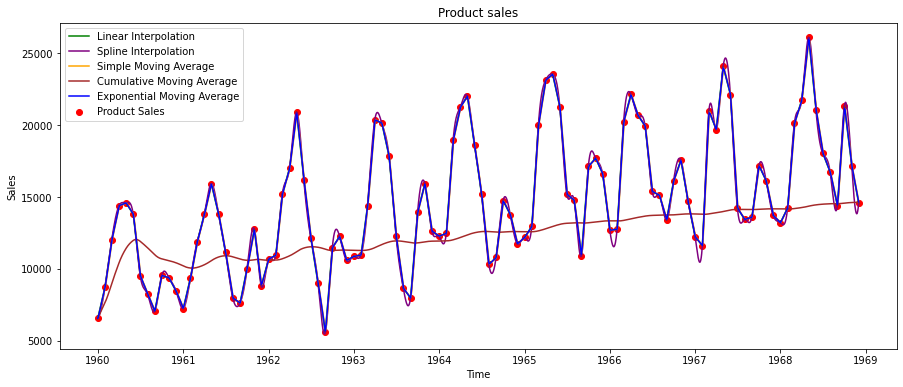

In [296]:
# Plot product sales
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.plot(data.index, data['Spline'], c=colors[2], label='Spline Interpolation') 
ax.plot(data.index, data['SMA'], c=colors[3], label='Simple Moving Average')
ax.plot(data.index, data['CMA'], c=colors[4], label='Cumulative Moving Average')
ax.plot(data.index, data['EMA'], c=colors[5], label='Exponential Moving Average')
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

### Kalman Smoothing
http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

Recursive algorithm for estimating the state of a system where the expected mean-squared error is minimized. The algorithm operates in a prediction-correction cycle. 

[Wiki](https://towardsdatascience.com/state-space-model-and-kalman-filter-for-time-series-prediction-basic-structural-dynamic-linear-2421d7b49fa6)

In [297]:
# Install pykalman module
!pip install pykalman

In [298]:
# Import pykalman module
from pykalman import KalmanFilter

In [299]:
# Calculate Kalman Smoothing
kf = KalmanFilter(em_vars='LI') 
kf = kf.em(data['LI'])
kf.initial_state_mean = data['LI'].mean() 
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(data['LI'])
data['KF'] = smoothed_state_means

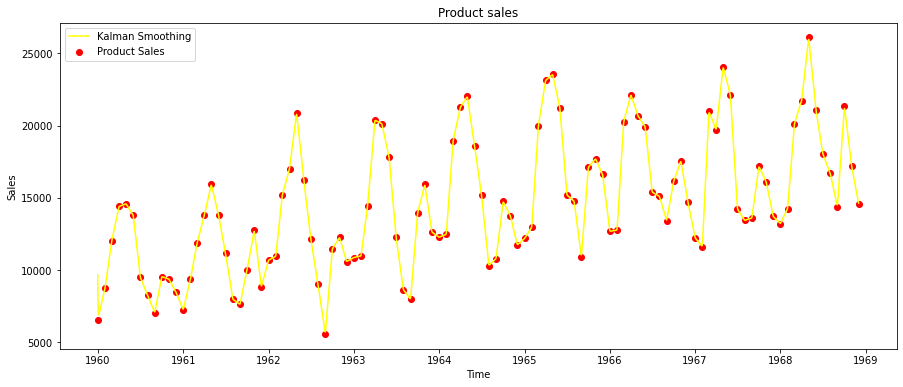

In [300]:
# Plot Kalman Smoothing 
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['KF'], c=colors[6], label='Kalman Smoothing')
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();

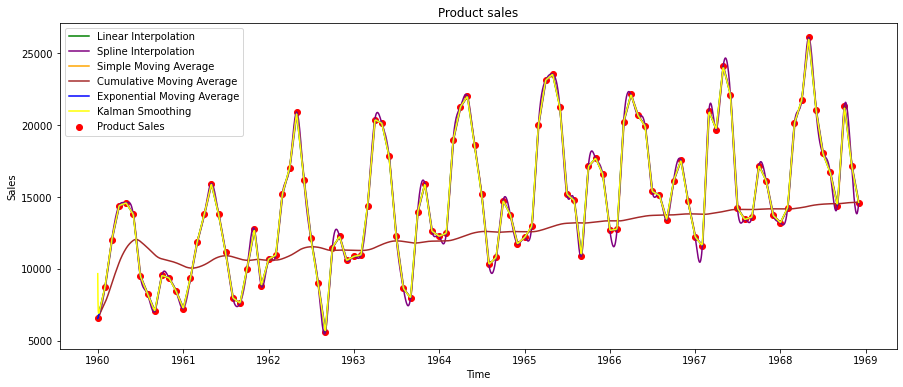

In [301]:
# Plot product sales
fig, ax = plt.subplots(figsize=(15,6))
colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue', 'yellow']
ax.scatter(data.index, data['Sales'], c=colors[0], label='Product Sales') #original data
ax.plot(data.index, data['LI'], c=colors[1], label='Linear Interpolation') 
ax.plot(data.index, data['Spline'], c=colors[2], label='Spline Interpolation') 
ax.plot(data.index, data['SMA'], c=colors[3], label='Simple Moving Average')
ax.plot(data.index, data['CMA'], c=colors[4], label='Cumulative Moving Average')
ax.plot(data.index, data['EMA'], c=colors[5], label='Exponential Moving Average')
ax.plot(data.index, data['KF'], c=colors[6], label='Kalman Smoothing')
ax.set_title('Product sales')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.legend();